C:\Users\HP\AppData\Local\Temp\ipykernel_21288\3048096261.py:72: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\HP\AppData\Local\Temp\ipykernel_21288\3048096261.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


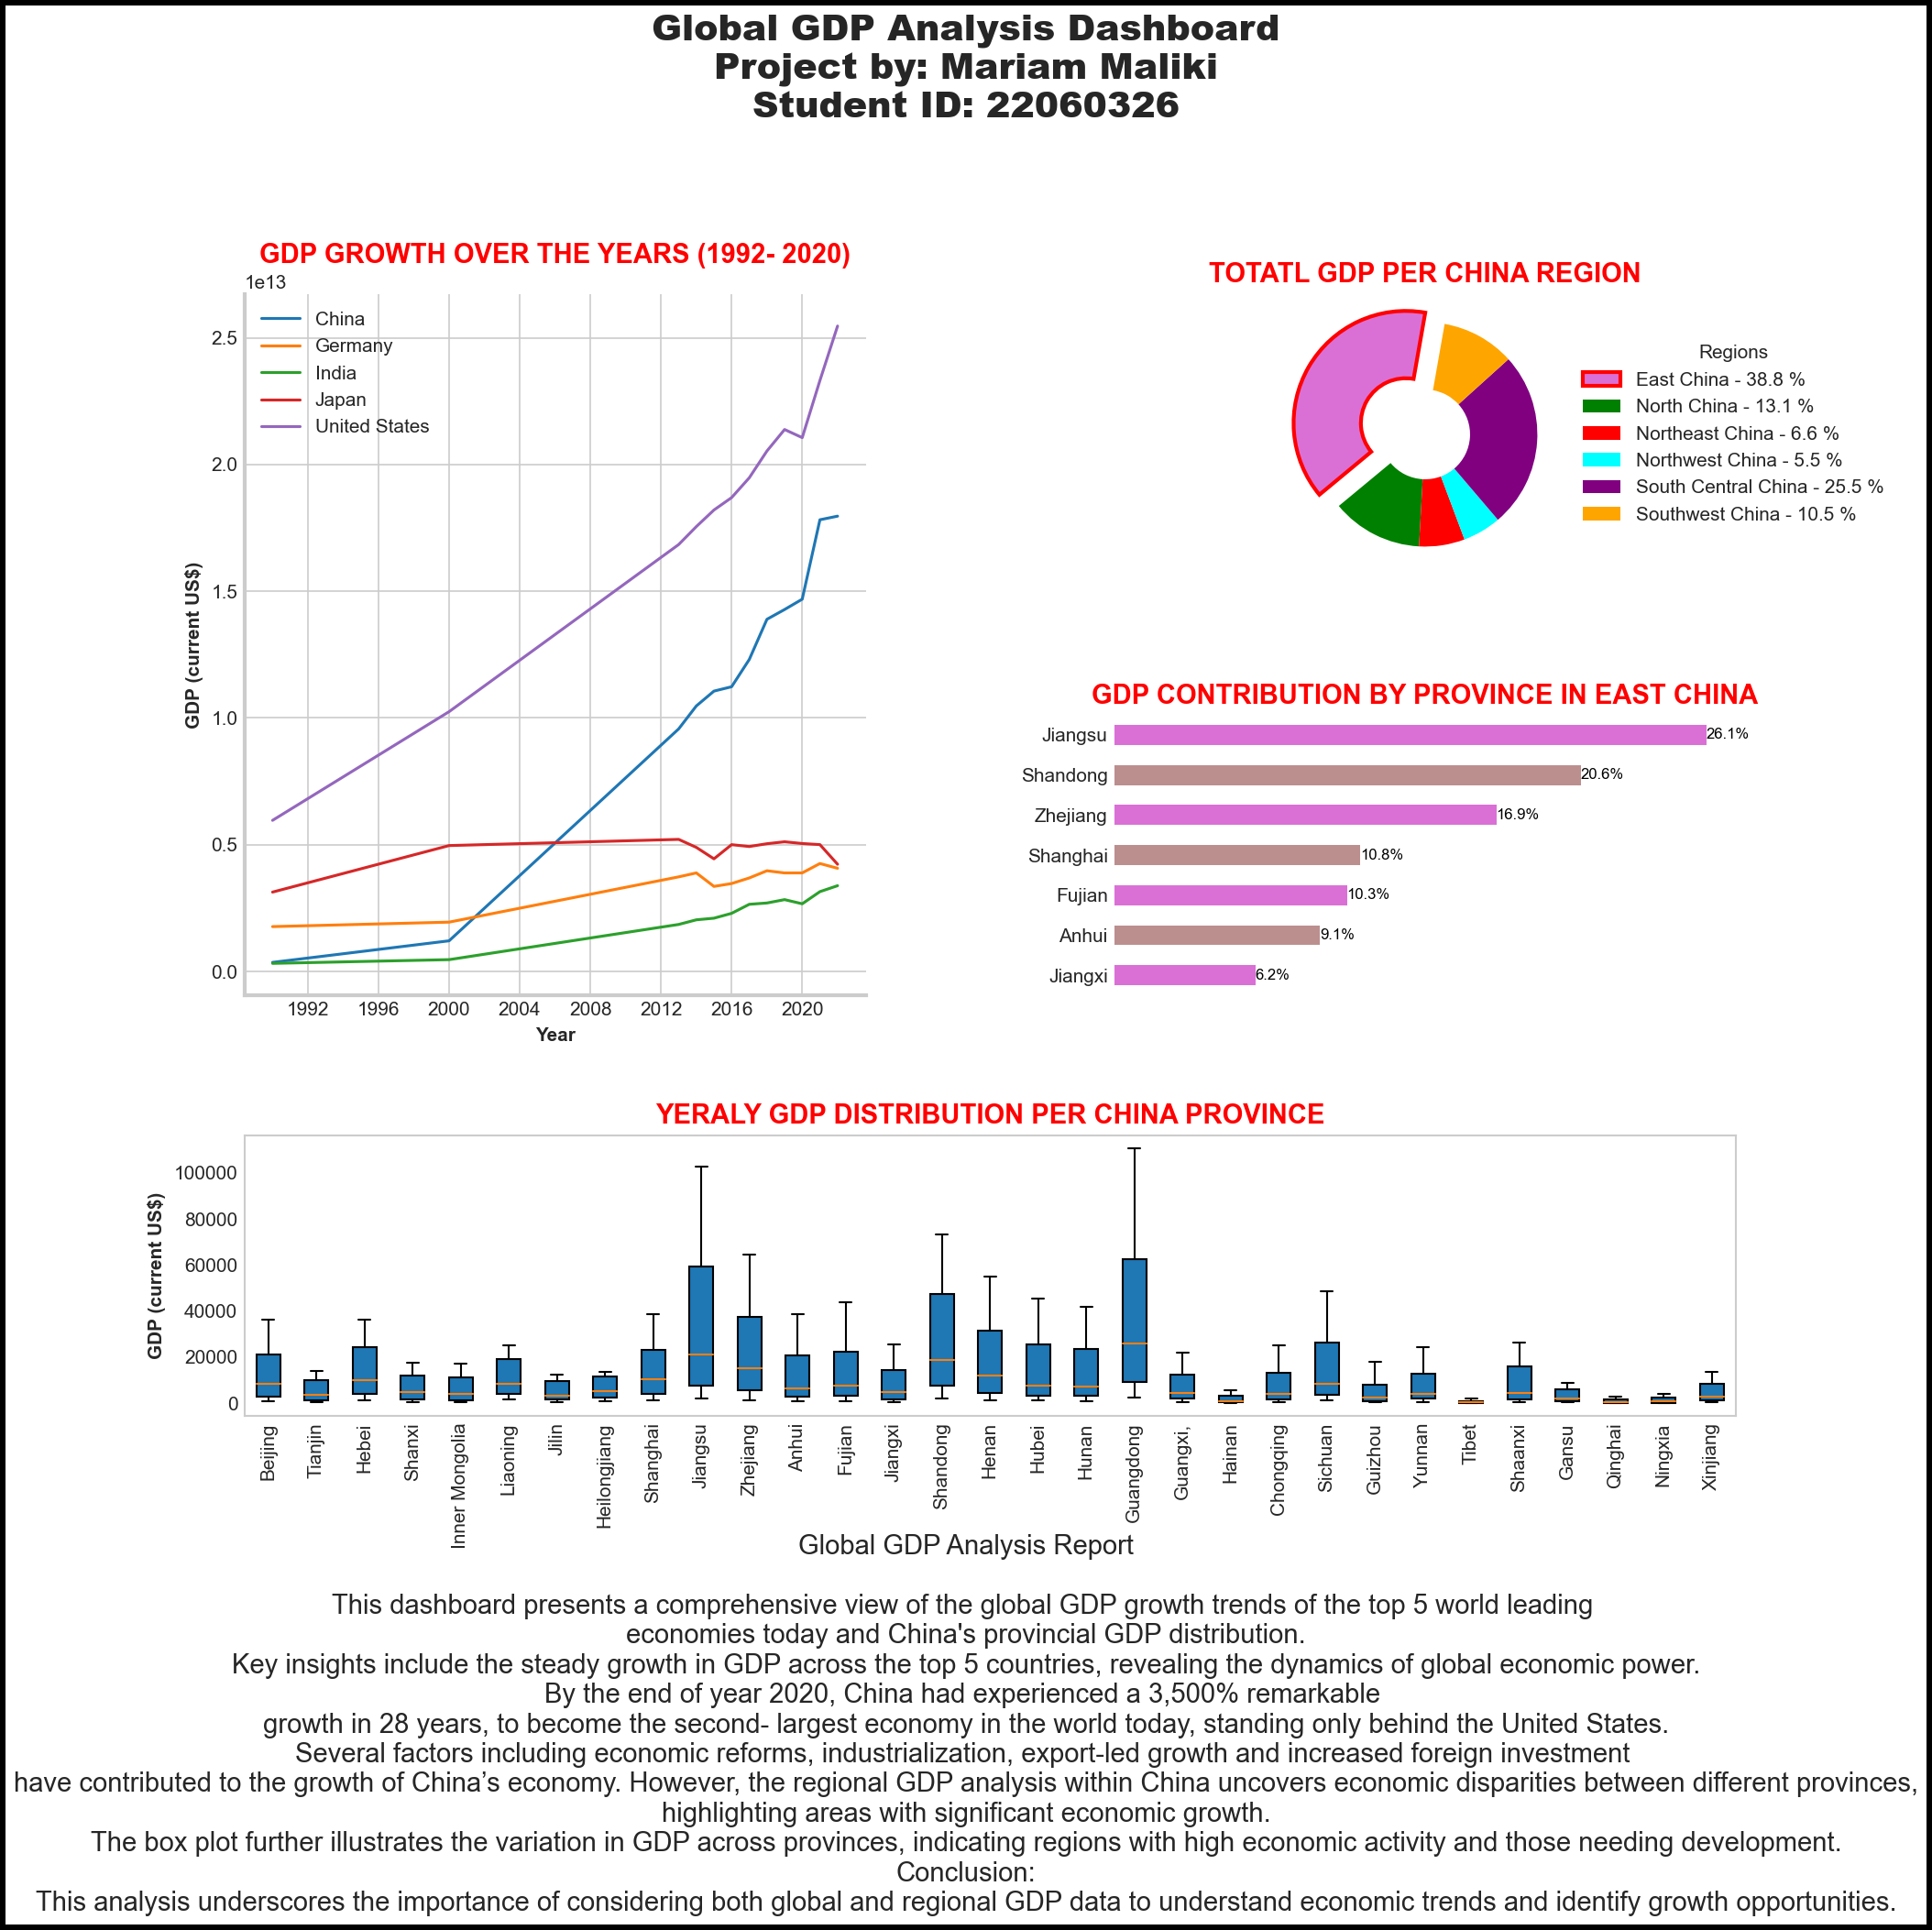

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan  5 06:11:54 2024

@author: Mariam T. Maliki
"""

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import pandas as pd

# Data Preparation
# Read CSV files into pandas
gdp_data = pd.read_csv('GDP for 5 countries.csv')
china_gdp = pd.read_csv('Chinas GDP in Province En.csv')

# Rename the 'Unnamed: 0' column to 'Year' in china_gdp DataFrame
china_gdp = china_gdp.rename(columns={'Unnamed: 0': 'Year'})

# Drop columns irrelevant to the data preprocessing
gdp_data_cleaned = gdp_data.drop(['Series Name', 'Series Code'], axis=1)

# Melt the dataframes to convert it from wide to long format
gdp_data = gdp_data_cleaned.melt(id_vars=['Country Name', 'Country Code'],
                                 var_name='Year', value_name='GDP')
china_gdp = china_gdp.melt(id_vars=['Year'], var_name='Province',
                           value_name='GDP')

# Extract the year from the 'Year' column in gdp_data and
# convert it to datetime
gdp_data['Year'] = gdp_data['Year'].str.extract('(\d+)').astype(int)
gdp_data['Year'] = pd.to_datetime(gdp_data['Year'], format='%Y')

# Ensure the GDP values in gdp_data are numeric (float)
gdp_data['GDP'] = pd.to_numeric(gdp_data['GDP'], errors='coerce')

# Sort the gdp_data by Country and Year
gdp_data = gdp_data.sort_values(by=['Country Name', 'Year'])

# Define a mapping of provinces to regions
province_to_region = {
    # [List of provinces and their corresponding regions]
    'Anhui': 'East China', 'Shanghai': 'East China', 'Shandong': 'East China',
    'Jiangxi': 'East China', 'Jiangsu': 'East China', 'Zhejiang': 'East China',
    'Fujian': 'East China', 'Tianjin': 'North China', 'Shanxi': 'North China',
    'Beijing': 'North China', 'Hebei': 'North China',
    'Inner Mongolia': 'North China', 'Liaoning': 'Northeast China',
    'Jilin': 'Northeast China', 'Heilongjiang': 'Northeast China',
    'Xinjiang': 'Northwest China', 'Gansu': 'Northwest China',
    'Ningxia': 'Northwest China', 'Qinghai': 'Northwest China',
    'Shaanxi': 'Northwest China', 'Hubei': 'South Central China',
    'Guangxi': 'South Central China', 'Hainan': 'South Central China',
    'Guangdong': 'South Central China', 'Henan': 'South Central China',
    'Hunan': 'South Central China', 'Guizhou': 'Southwest China',
    'Sichuan': 'Southwest China', 'Tibet': 'Southwest China',
    'Yunnan': 'Southwest China', 'Chongqing': 'Southwest China'
}

# Map the provinces in china_gdp to the regions
china_gdp['Region'] = china_gdp['Province'].map(province_to_region)

# Filter the dataframe for the specified years
china_gdp_long = china_gdp[(china_gdp['Year'] >= 1992) &
                           (china_gdp['Year'] <= 2020)]

# Prepare the data for plotting
provinces = china_gdp_long['Province'].unique()
data_to_plot = [china_gdp_long.loc[china_gdp_long['Province'] == province,
                                   'GDP'].values for province in provinces]

# Plotting styles
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(14, 12), dpi=150)  # Adjusted for larger size
plt.suptitle('Global GDP Analysis Dashboard\n'
             'Project by: Mariam Maliki\nStudent ID: 22060326',
             weight=1000, size=19, y=1.05)

# Creating a gridspec layout
gspec = gs.GridSpec(3, 2, wspace=0.4, hspace=0.5)  # 3 rows and 2 columns

# Plot 1: GDP Growth Over the Years for top 5 countries
ax1 = plt.subplot(gspec[0:2, 0])  # Moved to the second row, first column

for country in gdp_data['Country Name'].unique():
    country_data = gdp_data[gdp_data['Country Name'] == country]
    ax1.plot(country_data['Year'], country_data['GDP'], label=country)
ax1.set_title('GDP GROWTH OVER THE YEARS (1992- 2020)', fontsize=14, 
              fontweight='bold', color='red')
ax1.set_xlabel('Year', fontsize=10, fontweight='bold')
ax1.set_ylabel('GDP (current US$)', fontsize=10, fontweight='bold')
ax1.legend()
ax1.grid(True)  # Add gridlines for the first subplot

# Remove top and right border lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# Bolden the visible border lines
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Plot 2: Total GDP per China Region with Emphasis on East China
ax2 = plt.subplot(gspec[0, 1])  # Second row, second column
# Grouping GDP data by region and summing it up
region_gdp = china_gdp.groupby('Region')['GDP'].sum()
# Define colors for each region
colors = ['orchid', 'green', 'red', 'cyan', 'purple', 'orange']
# Creating an 'explode' array to highlight East China
explode = [0.2 if region == 'East China' else 0 for region in region_gdp.index]
# Creating the doughnut chart
wedges, _ = ax2.pie(region_gdp, colors=colors, startangle=80,
                    wedgeprops=dict(width=0.6), explode=explode)
# Outline and emphasize the East China slice
for wedge, region in zip(wedges, region_gdp.index):
    if region == 'East China':
        wedge.set_edgecolor('red')  # Setting a distinct edge color for East C.
        wedge.set_linewidth(2)  # Setting the width of the outline
# Setting the title
ax2.set_title('TOTATL GDP PER CHINA REGION', fontsize=14, fontweight='bold', 
              color='red')
# Creating the legend with percentages
region_labels = ['{0} - {1:1.1f} %'.format(i, j) for i,
                 j in zip(region_gdp.index, 100 * region_gdp /
                          region_gdp.sum())]
ax2.legend(wedges, region_labels, title="Regions", loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()

# Plot 3: Horizontal Bar Plot for Each Province's Contribution in East China
ax3 = plt.subplot(gspec[1, 1])  # Adding a new row for the fourth plot

# Filter data for East China region
east_china_data = china_gdp_long[china_gdp_long['Region'] == 'East China']

# Calculate total GDP for East China region
total_gdp_east_china = east_china_data['GDP'].sum()

# Calculate the percentage contribution of each province
province_contribution = east_china_data.groupby(
    'Province')['GDP'].sum() / total_gdp_east_china * 100

# Creating the horizontal bar plot
# Create a list of alternating colors for the bars
colors = ['orchid' if i % 2 == 0 else 'rosybrown' for i in
          range(len(provinces))]
bars = province_contribution.sort_values().plot(kind='barh', ax=ax3, 
                                                color=colors)

# Setting the title and labels
ax3.set_title('GDP CONTRIBUTION BY PROVINCE IN EAST CHINA',
              fontsize=14, fontweight='bold', color='red')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])  # Remove x-axis ticks
ax3.grid(False)  # Disable gridlines for the third subplot

# Add percentage labels to the right of the bars
for bar in bars.patches:
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%',
             ha='left', va='center', fontsize=8, color='black')

# Remove border lines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

# Plot 4: Box plot for GDP distribution per province
# Spanning the subplot across all columns of the first row
ax4 = plt.subplot(gspec[2, :])
ax4.boxplot(data_to_plot, vert=True, patch_artist=True)
ax4.set_title('YERALY GDP DISTRIBUTION PER CHINA PROVINCE',
              fontsize=14, fontweight='bold', color='red')
ax4.set_xlabel('')
ax4.set_ylabel('GDP (current US$)', fontsize=10, fontweight='bold')
ax4.set_xticklabels(provinces, rotation=90)
ax4.grid(False)  # Disable gridlines for the fourth subplot

# Summary Textbox
summary_text = (
    "Global GDP Analysis Report\n\n"
    "This dashboard presents a comprehensive view of the global GDP growth "
    "trends of the top 5 world leading \n"
    "economies today and China's provincial GDP distribution.\n"
    "Key insights include the steady growth in GDP across the top 5 countries,"
    " revealing the dynamics of global economic power.\n"
    "By the end of year 2020, China had experienced a 3,500% remarkable \n"
    "growth in 28 years, to become the second- largest economy in the world "
    "today, standing only behind the United States.\n"
    "Several factors including economic reforms, industrialization, export-led"
    " growth and increased foreign investment \n"
    "have contributed to the growth of China’s economy. "
    "However, the regional GDP analysis within China uncovers economic "
    "disparities between different provinces,\n"
    "highlighting areas with significant economic growth.\n"
    "The box plot further illustrates the variation in GDP across provinces, "
    "indicating regions with high economic activity and those needing "
    "development.\n"
    "Conclusion:\n"
    "This analysis underscores the importance of considering both global and "
    "regional GDP data to understand economic trends and identify growth "
    "opportunities."
)

textbox = plt.text(0.5, -0.1, summary_text, transform=fig.transFigure,
                   fontsize=14, fontweight='light',
                   horizontalalignment='center')

plt.subplots_adjust(bottom=0.2)

# Setting a border around the dashboard
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('black')

# Display the plot
plt.show()